In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import hddm 
from patsy import dmatrix 
import numpy as np
from sys import platform
print(hddm.__version__)

%matplotlib inline
# plt.rcParams['figure.figsize'] = 30, 10
sns.set_context("notebook", font_scale=10, rc={"lines.linewidth": 10, "lines.markersize": 30})

0.6.0


/anaconda3/envs/hddm/lib/python3.5/site-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


In [3]:
if platform == 'linux':
    home = '/home/krista/'
elif platform == 'darwin': 
    home = '/Users/67981492/'

In [4]:
!pwd
write_dir = home + 'Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/hddm_reg_models/'

/Users/67981492/Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/analysis_nbs


In [5]:
all_sim_data = hddm.load_csv(home + 'Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/aggregated_data/probC_sim_learning_signals_processed.csv')

In [7]:
#test loading
a_cpp_t_B_sim_reg=hddm.load(write_dir+'a_cpp_t_B_sim_reg')
a_cpp_v_B_sim_reg=hddm.load(write_dir+'a_cpp_v_B_sim_reg')
t_cpp_a_B_sim_reg=hddm.load(write_dir+'t_cpp_a_B_sim_reg')

t_cpp_v_B_sim_reg=hddm.load(write_dir+'t_cpp_v_B_sim_reg')
v_cpp_a_B_sim_reg=hddm.load(write_dir+'v_cpp_a_B_sim_reg')
v_cpp_t_B_sim_reg=hddm.load(write_dir+'v_cpp_t_B_sim_reg')

# a_cpp_v_B_sim_reg.save(write_dir+'a_cpp_v_B_sim_reg')
# t_cpp_a_B_sim_reg.save(write_dir+'t_cpp_a_B_sim_reg')

# t_cpp_v_B_sim_reg.save(write_dir+'t_cpp_v_B_sim_reg')
# v_cpp_a_B_sim_reg.save(write_dir+'v_cpp_a_B_sim_reg')
# v_cpp_t_B_sim_reg.save(write_dir+'v_cpp_t_B_sim_reg')

In [18]:
t_cpp_a_B_sim_reg.depends

{'a': (),
 'a_B:C(cond)[hc]': (),
 'a_B:C(cond)[hv]': (),
 'a_B:C(cond)[lc]': (),
 'a_B:C(cond)[lv]': (),
 'a_Intercept': (),
 't': (),
 't_Intercept': (),
 't_cpp:C(cond)[hc]': (),
 't_cpp:C(cond)[hv]': (),
 't_cpp:C(cond)[lc]': (),
 't_cpp:C(cond)[lv]': (),
 'v': (),
 'z': ()}

# Plot model fits

In [8]:
dics = [a_cpp_t_B_sim_reg.dic, a_cpp_v_B_sim_reg.dic,t_cpp_a_B_sim_reg.dic,
    t_cpp_v_B_sim_reg.dic,]

In [85]:
dics_z =  [z_cpp_a_B_sim_reg.dic, z_cpp_v_B_sim_reg.dic, z_cpp_t_B_sim_reg.dic,
    a_cpp_z_B_sim_reg.dic, v_cpp_z_B_sim_reg.dic,t_cpp_z_B_sim_reg.dic]

In [87]:
dics_non_z = [a_cpp_t_B_sim_reg.dic, a_cpp_v_B_sim_reg.dic,t_cpp_a_B_sim_reg.dic,
    t_cpp_v_B_sim_reg.dic, v_cpp_a_B_sim_reg.dic, v_cpp_t_B_sim_reg.dic]
dics_z =  [z_cpp_a_B_sim_reg.dic, z_cpp_v_B_sim_reg.dic, z_cpp_t_B_sim_reg.dic,
    a_cpp_z_B_sim_reg.dic, v_cpp_z_B_sim_reg.dic,t_cpp_z_B_sim_reg.dic]

m_names_non_z = ['a_cpp & t_B', 'a_cpp & v_B', 't_cpp & a_B', 
't_cpp & v_B', 'v_cpp & a_B', 'v_cpp & t_B']

m_names_z =  [ 'z_cpp & a_B', 'z_cpp & v_B', 'z_cpp & t_B',
  'a_cpp & z_B', 'v_cpp & z_B', 't_cpp & z_B']

In [89]:
dics_non_z, dics_z

([-138202.95183041313,
  -164856.11569015772,
  -129544.9878638252,
  -150004.5290769955,
  -151447.61804078126,
  -147350.72210841603],
 [-151934.51658041388,
  -158309.46830021811,
  -139087.33731746554,
  -123819.95566952771,
  -121398.8756336479,
  -113412.06827991703])

In [ ]:
win_idx = np.where(dics_non_z==min(dics_non_z))[0]
m_names[win_idx]

In [ ]:
sns.set(font_scale=3)  
 
plt.bar(m_names_non_z, dics_non_z, color='r')
plt.ylim(min(dics_non_z) - 550, max(dics_non_z) + 500)
plt.ylabel('DIC score')
plt.title('Simulated: All unique pairwise combinations of parameters and learning signals')


In [ ]:
m_names[1], m_names[3], m_names[7]

In [ ]:
[dics[1], dics[3], dics[7]]

In [ ]:
plt.bar([m_names[1], m_names[3], m_names[7]], [dics[1], dics[3], dics[7]], color='r')
plt.ylim(dics[3] - 100, dics[2] + 100)
plt.ylabel('DIC score')
plt.title('Simulated: Winning and second-to-winning models')


In [ ]:
diff_first_second = z_cpp_v_B_sim_reg.dic - t_cpp_v_B_sim_reg.dic
print(diff_first_second)

# Plot posteriors of regression coefficients

In [10]:
#plot posteriors for winning model 
v_hc_gen, v_hv_gen,  v_lc_gen, v_lv_gen = a_cpp_v_B_sim_reg.nodes_db.ix[['v_B:C(cond)[hc]', 'v_B:C(cond)[hv]', 
                                                             'v_B:C(cond)[lc]', 'v_B:C(cond)[lv]'],
                                                          'node']


a_hc_gen, a_hv_gen, a_lc_gen, a_lv_gen = a_cpp_v_B_sim_reg.nodes_db.ix[['a_cpp:C(cond)[hc]', 'a_cpp:C(cond)[hv]', 
                                                             'a_cpp:C(cond)[lc]', 'a_cpp:C(cond)[lv]'],
                                                          'node']

/anaconda3/envs/hddm/lib/python3.5/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


Text(0.5,1,'Posteriors of $\\Omega$:threshold effect')

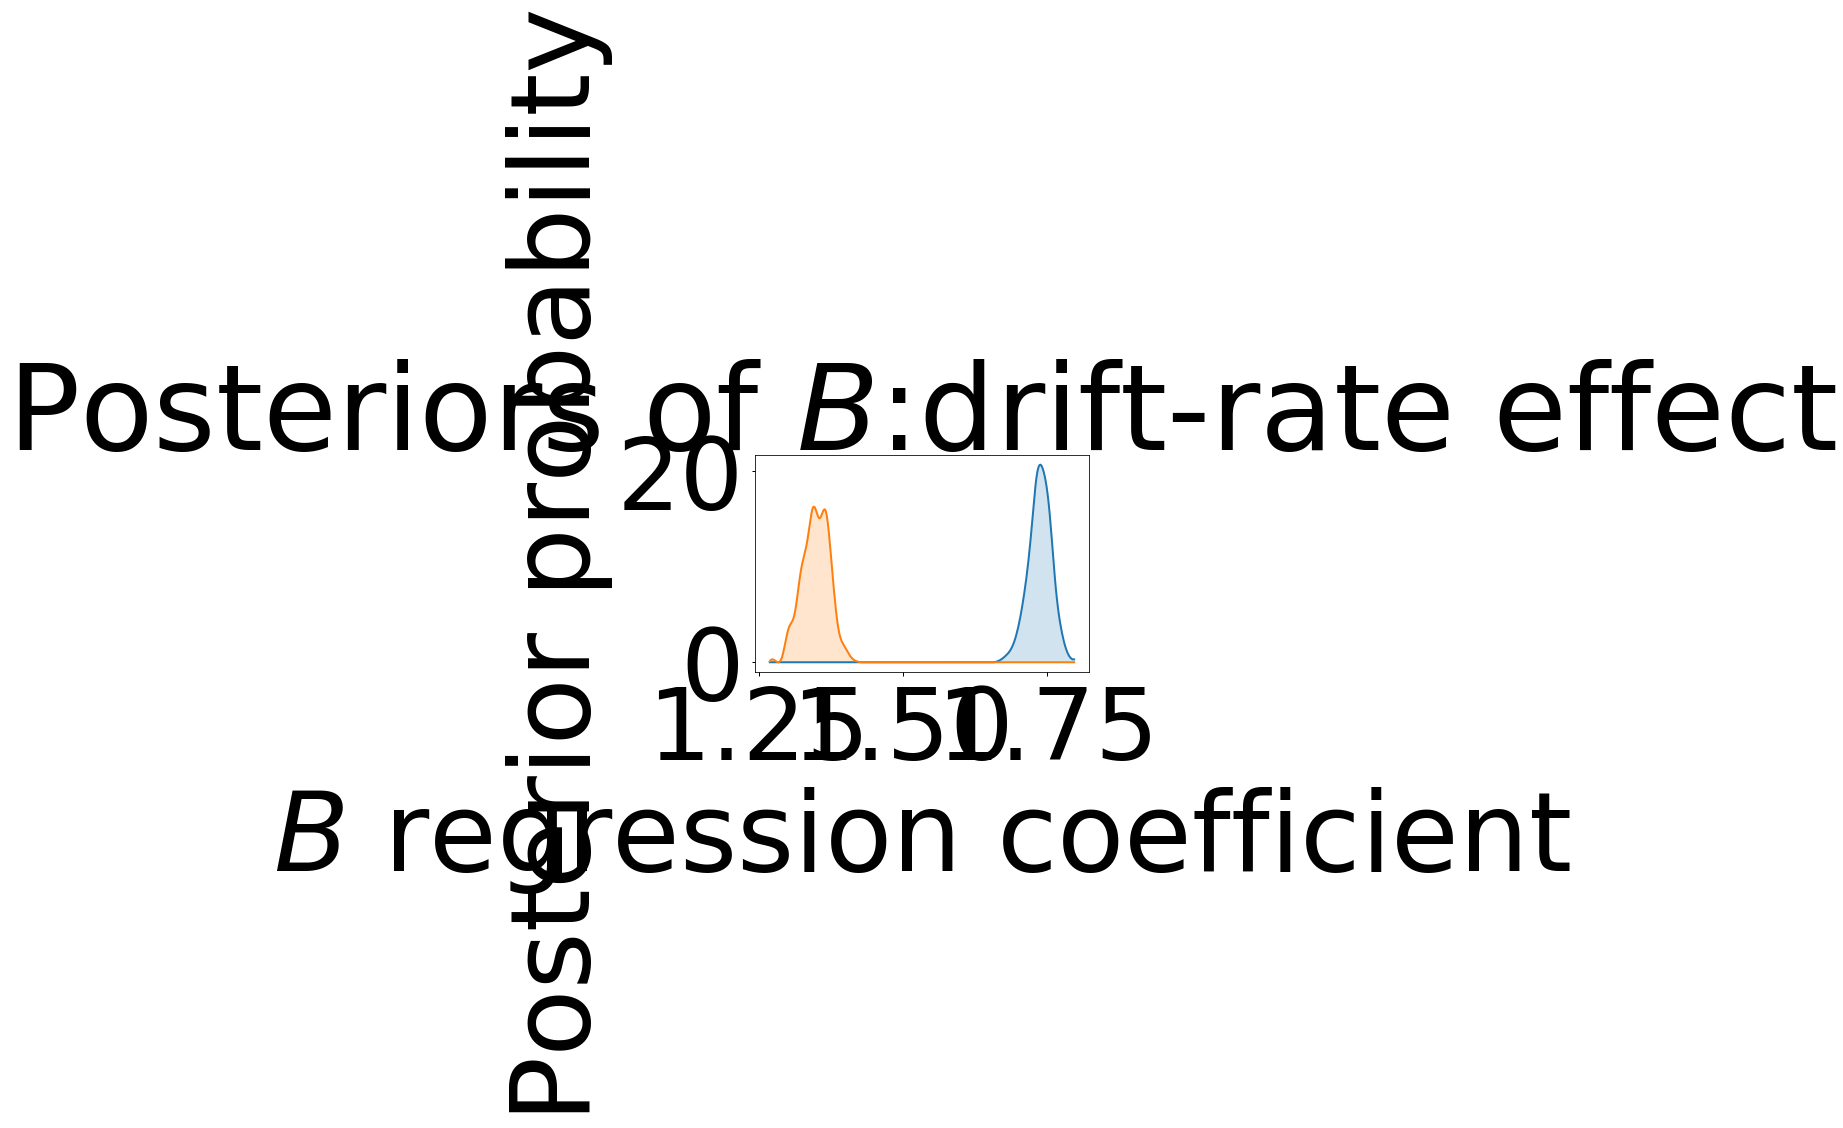

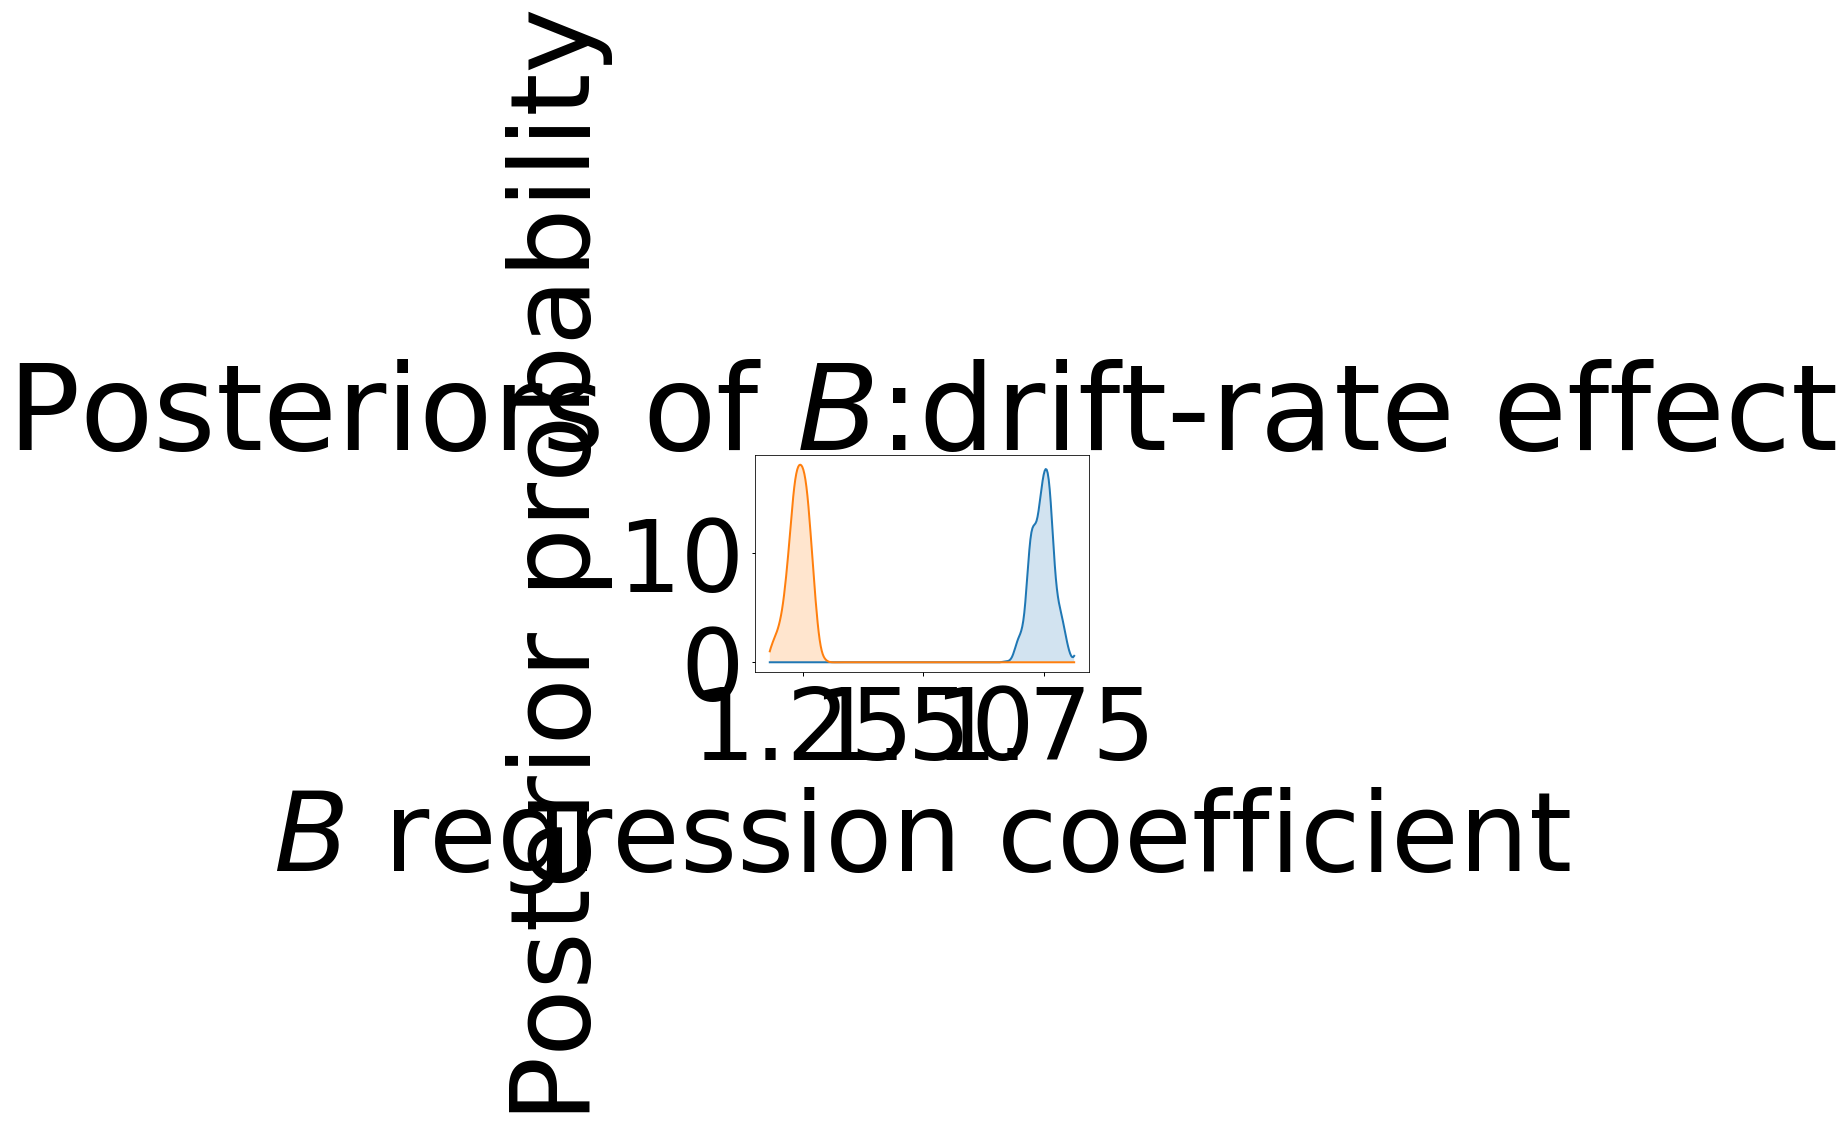

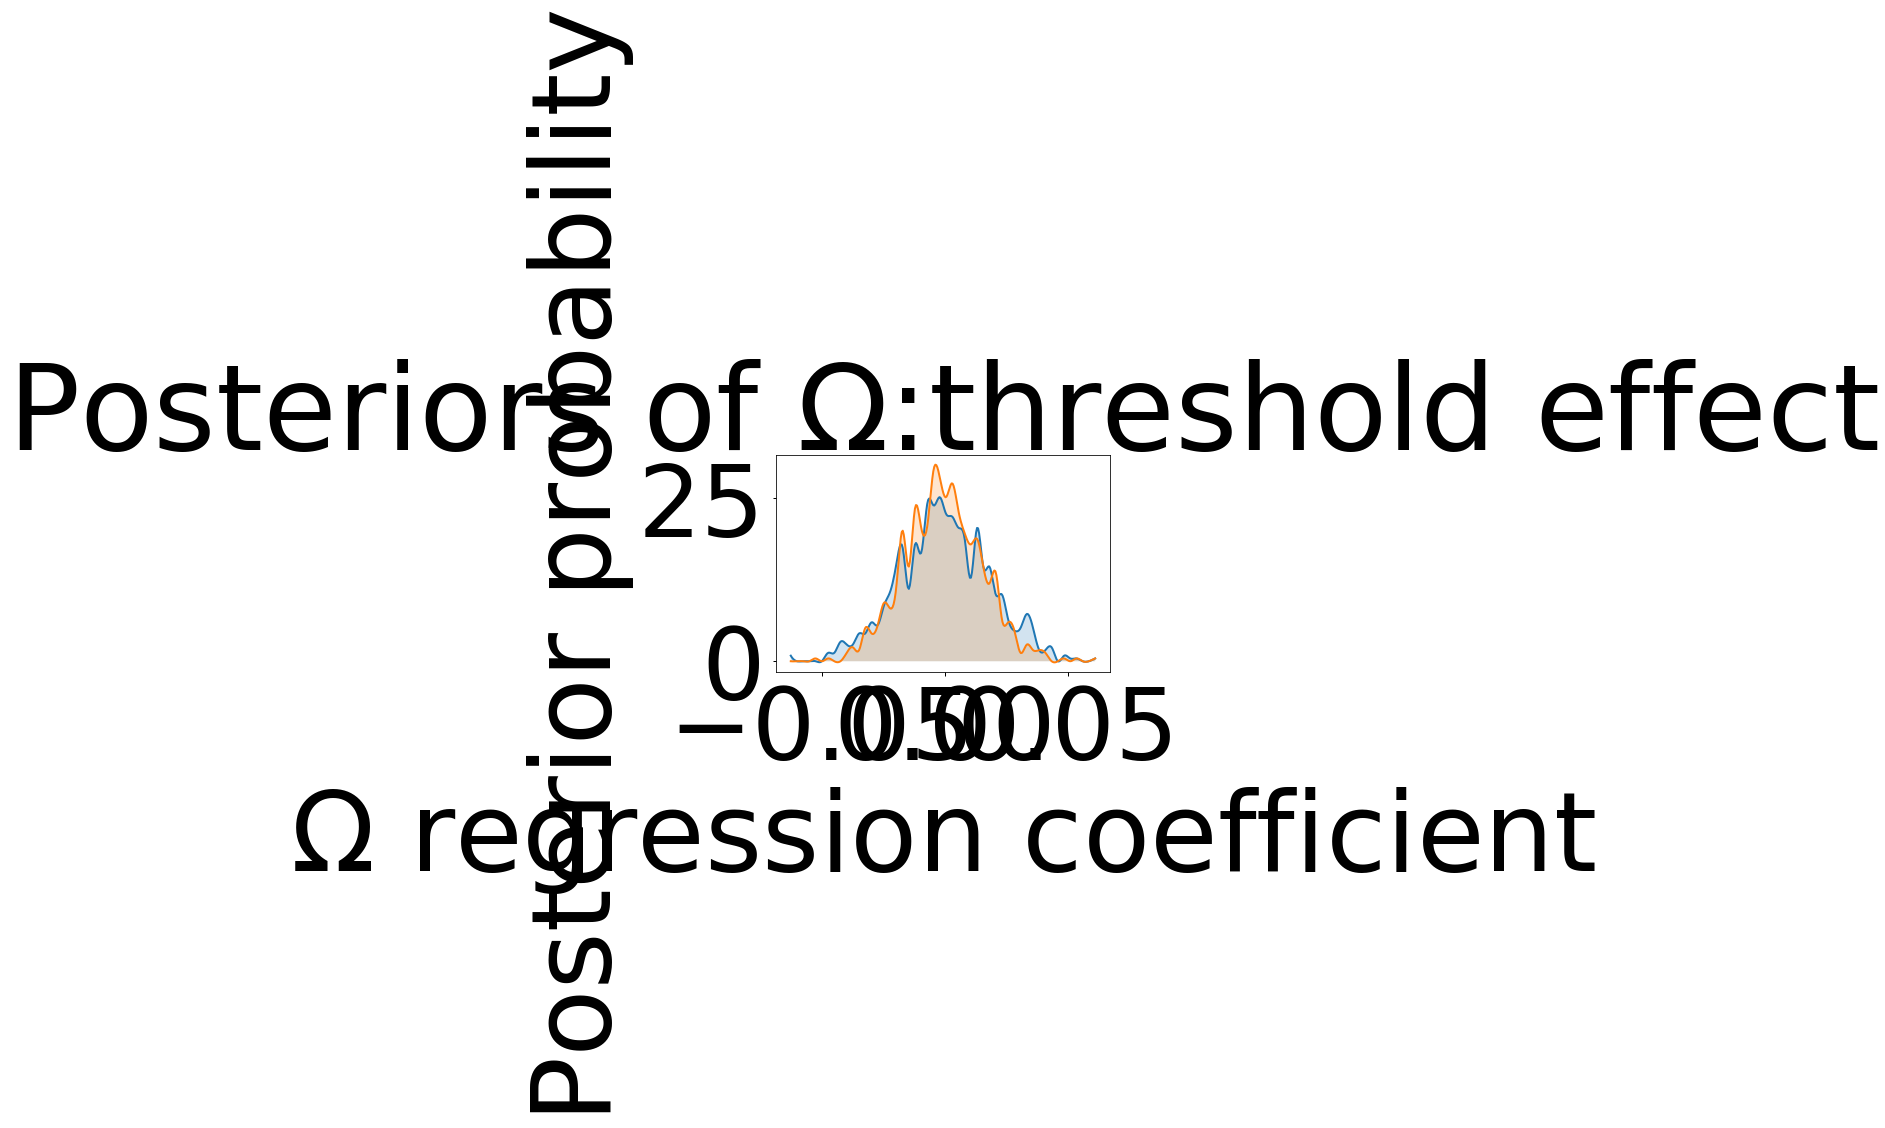

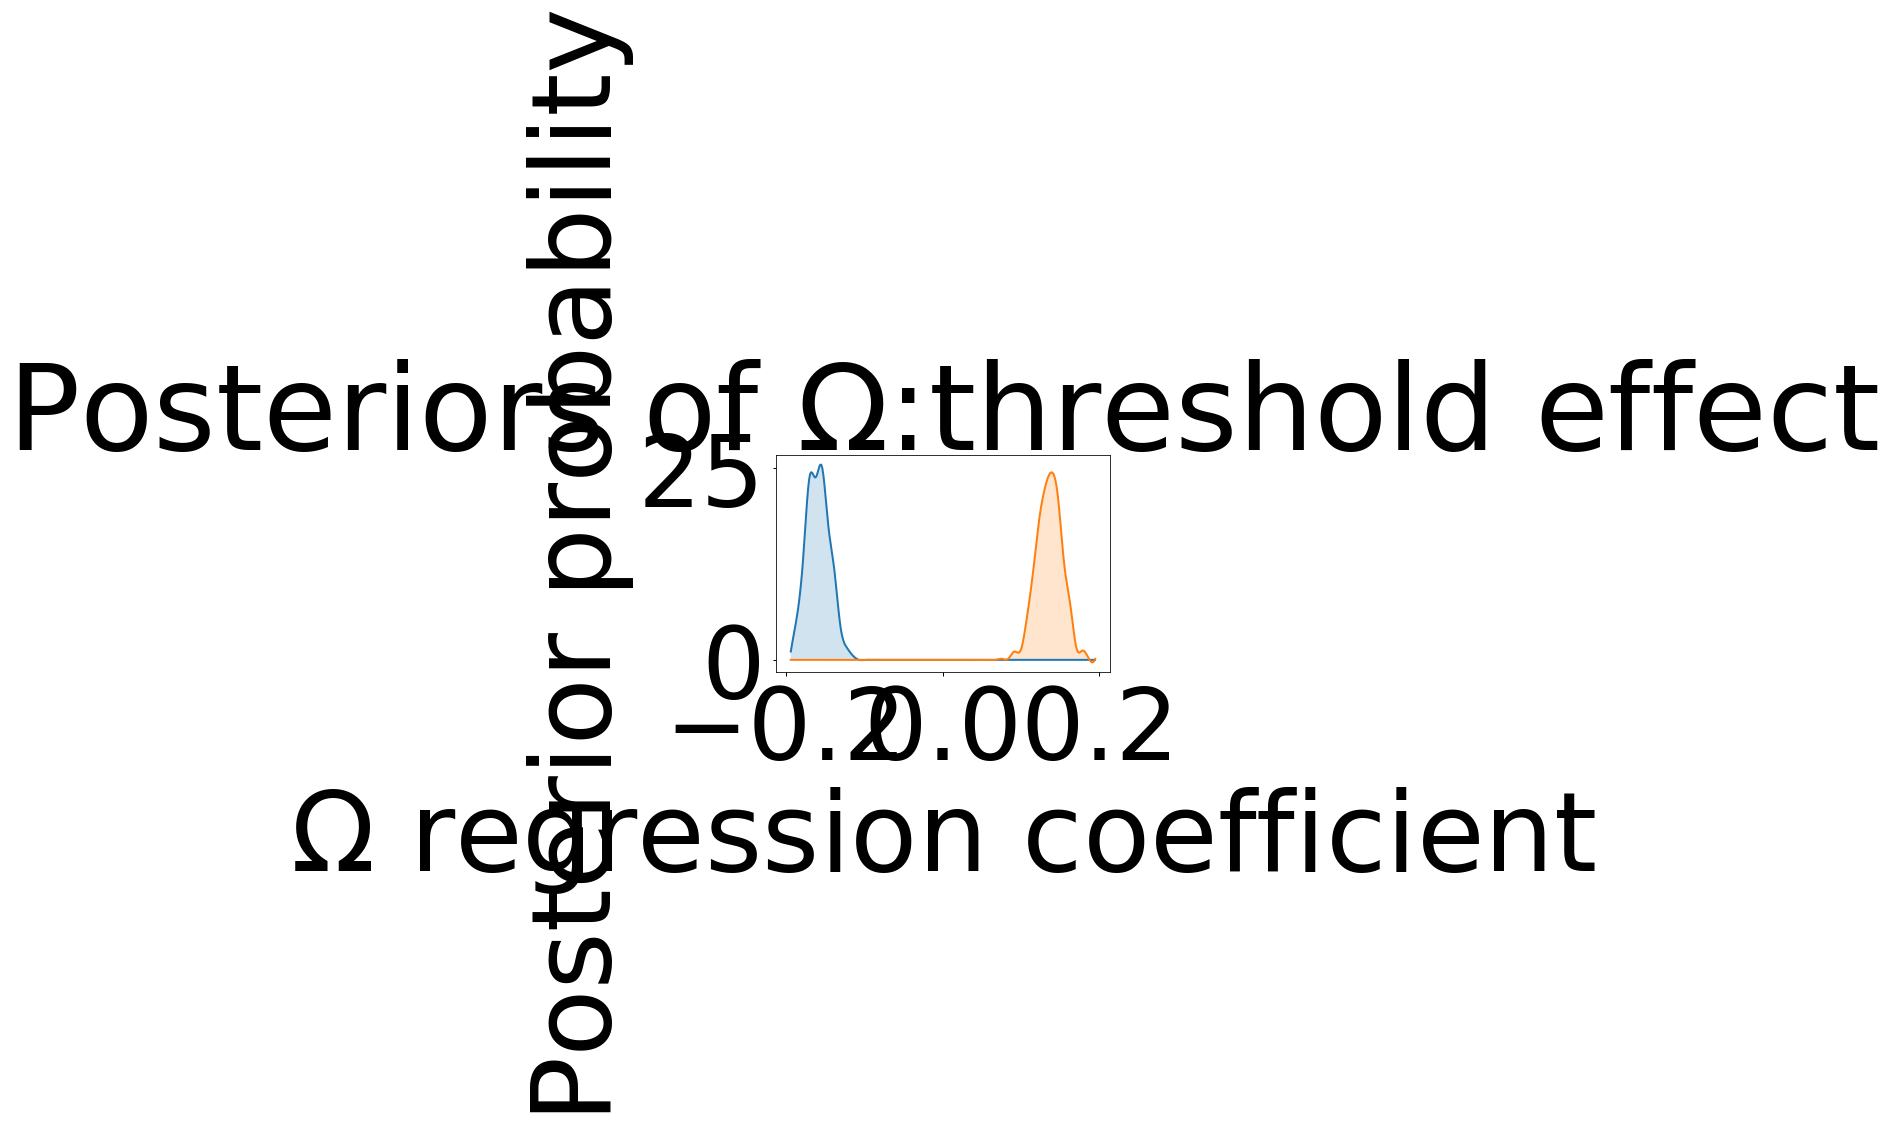

In [11]:
hddm.analyze.plot_posterior_nodes([v_lc_gen, v_hc_gen])
plt.xlabel('$B$ regression coefficient')
plt.ylabel('Posterior probability')
plt.title('Posteriors of $B$:drift-rate effect')
# plt.savefig('600t_drifa_conflict.pdf')

hddm.analyze.plot_posterior_nodes([v_lv_gen, v_hv_gen])
plt.xlabel('$B$ regression coefficient')
plt.ylabel('Posterior probability')
plt.title('Posteriors of $B$:drift-rate effect')
# plt.savefig('600a_drifa_vol.pdf')

hddm.analyze.plot_posterior_nodes([a_lc_gen, a_hc_gen])
plt.xlabel('$\Omega$ regression coefficient')
plt.ylabel('Posterior probability')
plt.title('Posteriors of $\Omega$:threshold effect')
# plt.savefig('600a_bound_conflict.pdf')


hddm.analyze.plot_posterior_nodes([a_lv_gen, a_hv_gen])
plt.xlabel('$\Omega$ regression coefficient')
plt.ylabel('Posterior probability')
plt.title('Posteriors of $\Omega$:threshold effect')
# plt.savefig('600a_bound_vol.pdf')


(1, 2)

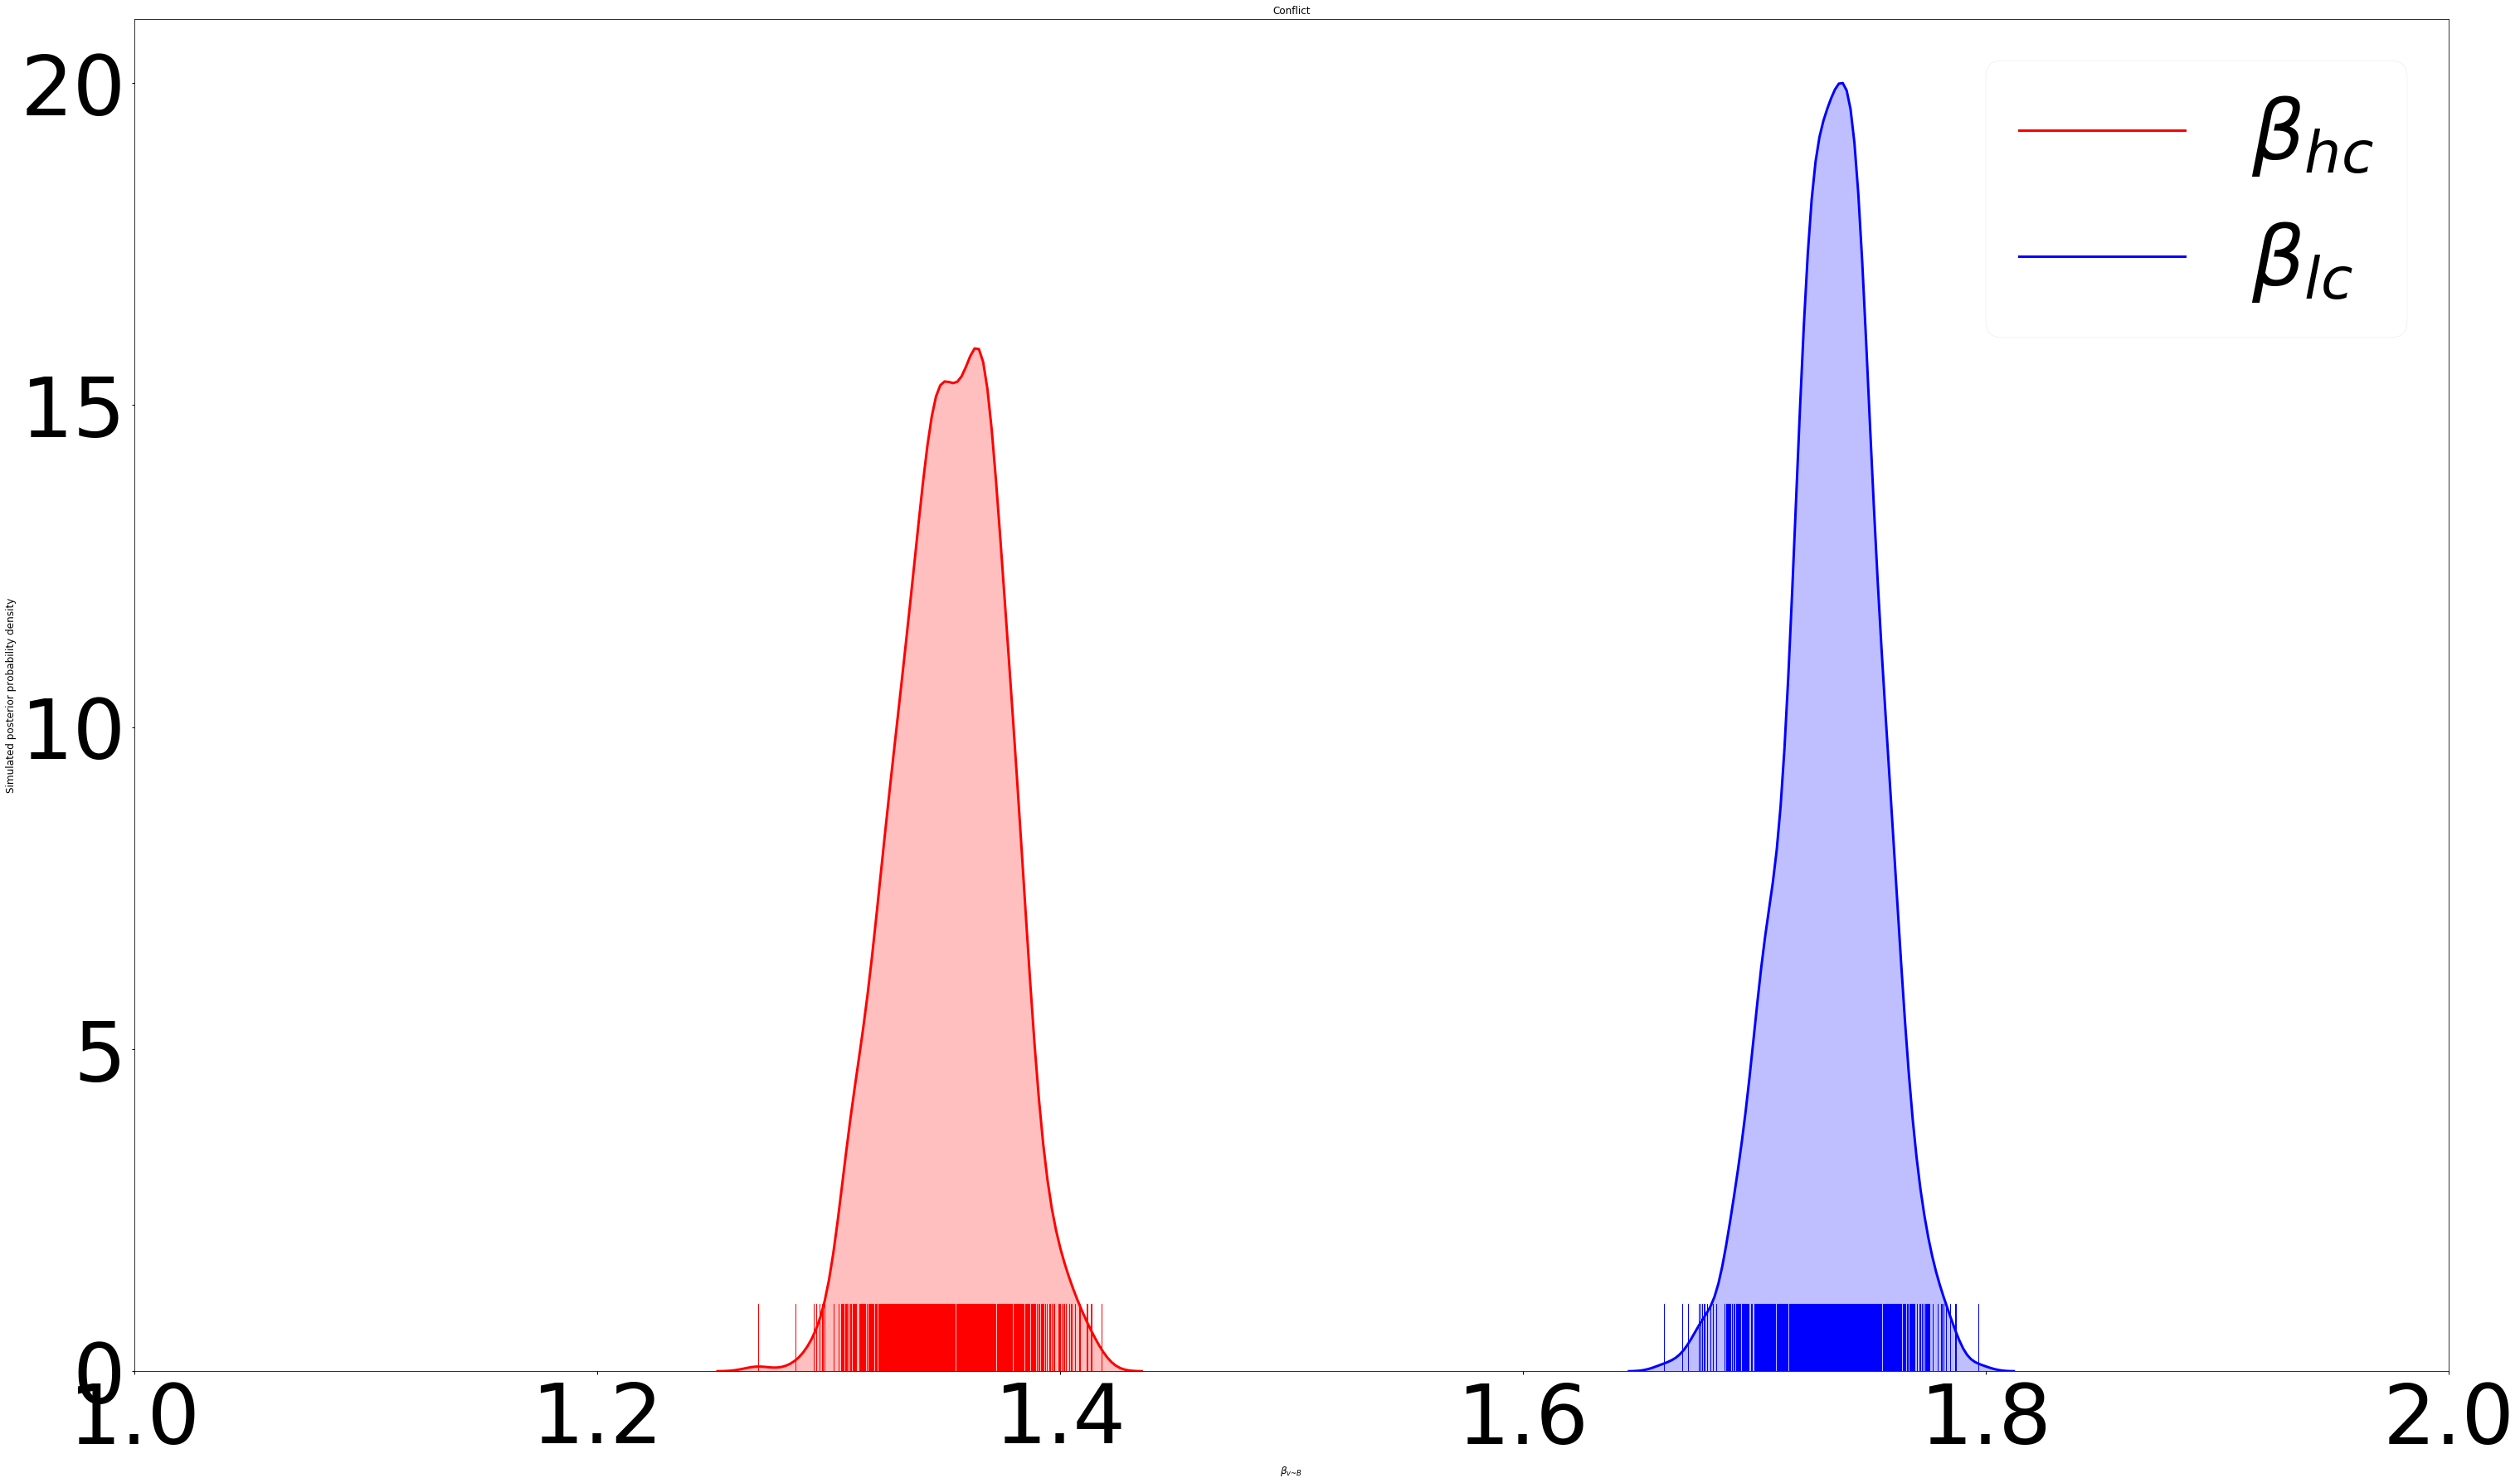

In [13]:
plt.figure(figsize=(50,30))
sns.distplot(v_hc_gen.trace(), label=r'$\beta_{hc}$', hist=False,rug=True,color='red', kde_kws = {'shade': True, 'linewidth': 3})
sns.distplot(v_lc_gen.trace(), label=r'$\beta_{lc}$', hist=False,rug=True,color='blue', kde_kws = {'shade': True, 'linewidth': 3})
plt.title('Conflict', fontsize='large')
plt.ylabel('Simulated posterior probability density', fontsize='large')
plt.xlabel(r'$\beta_{v\textasciitilde B}$',fontsize='large')
plt.xlim([1,2])
# plt.savefig('vB_betas_conflict_SIM.png', dpi=600)

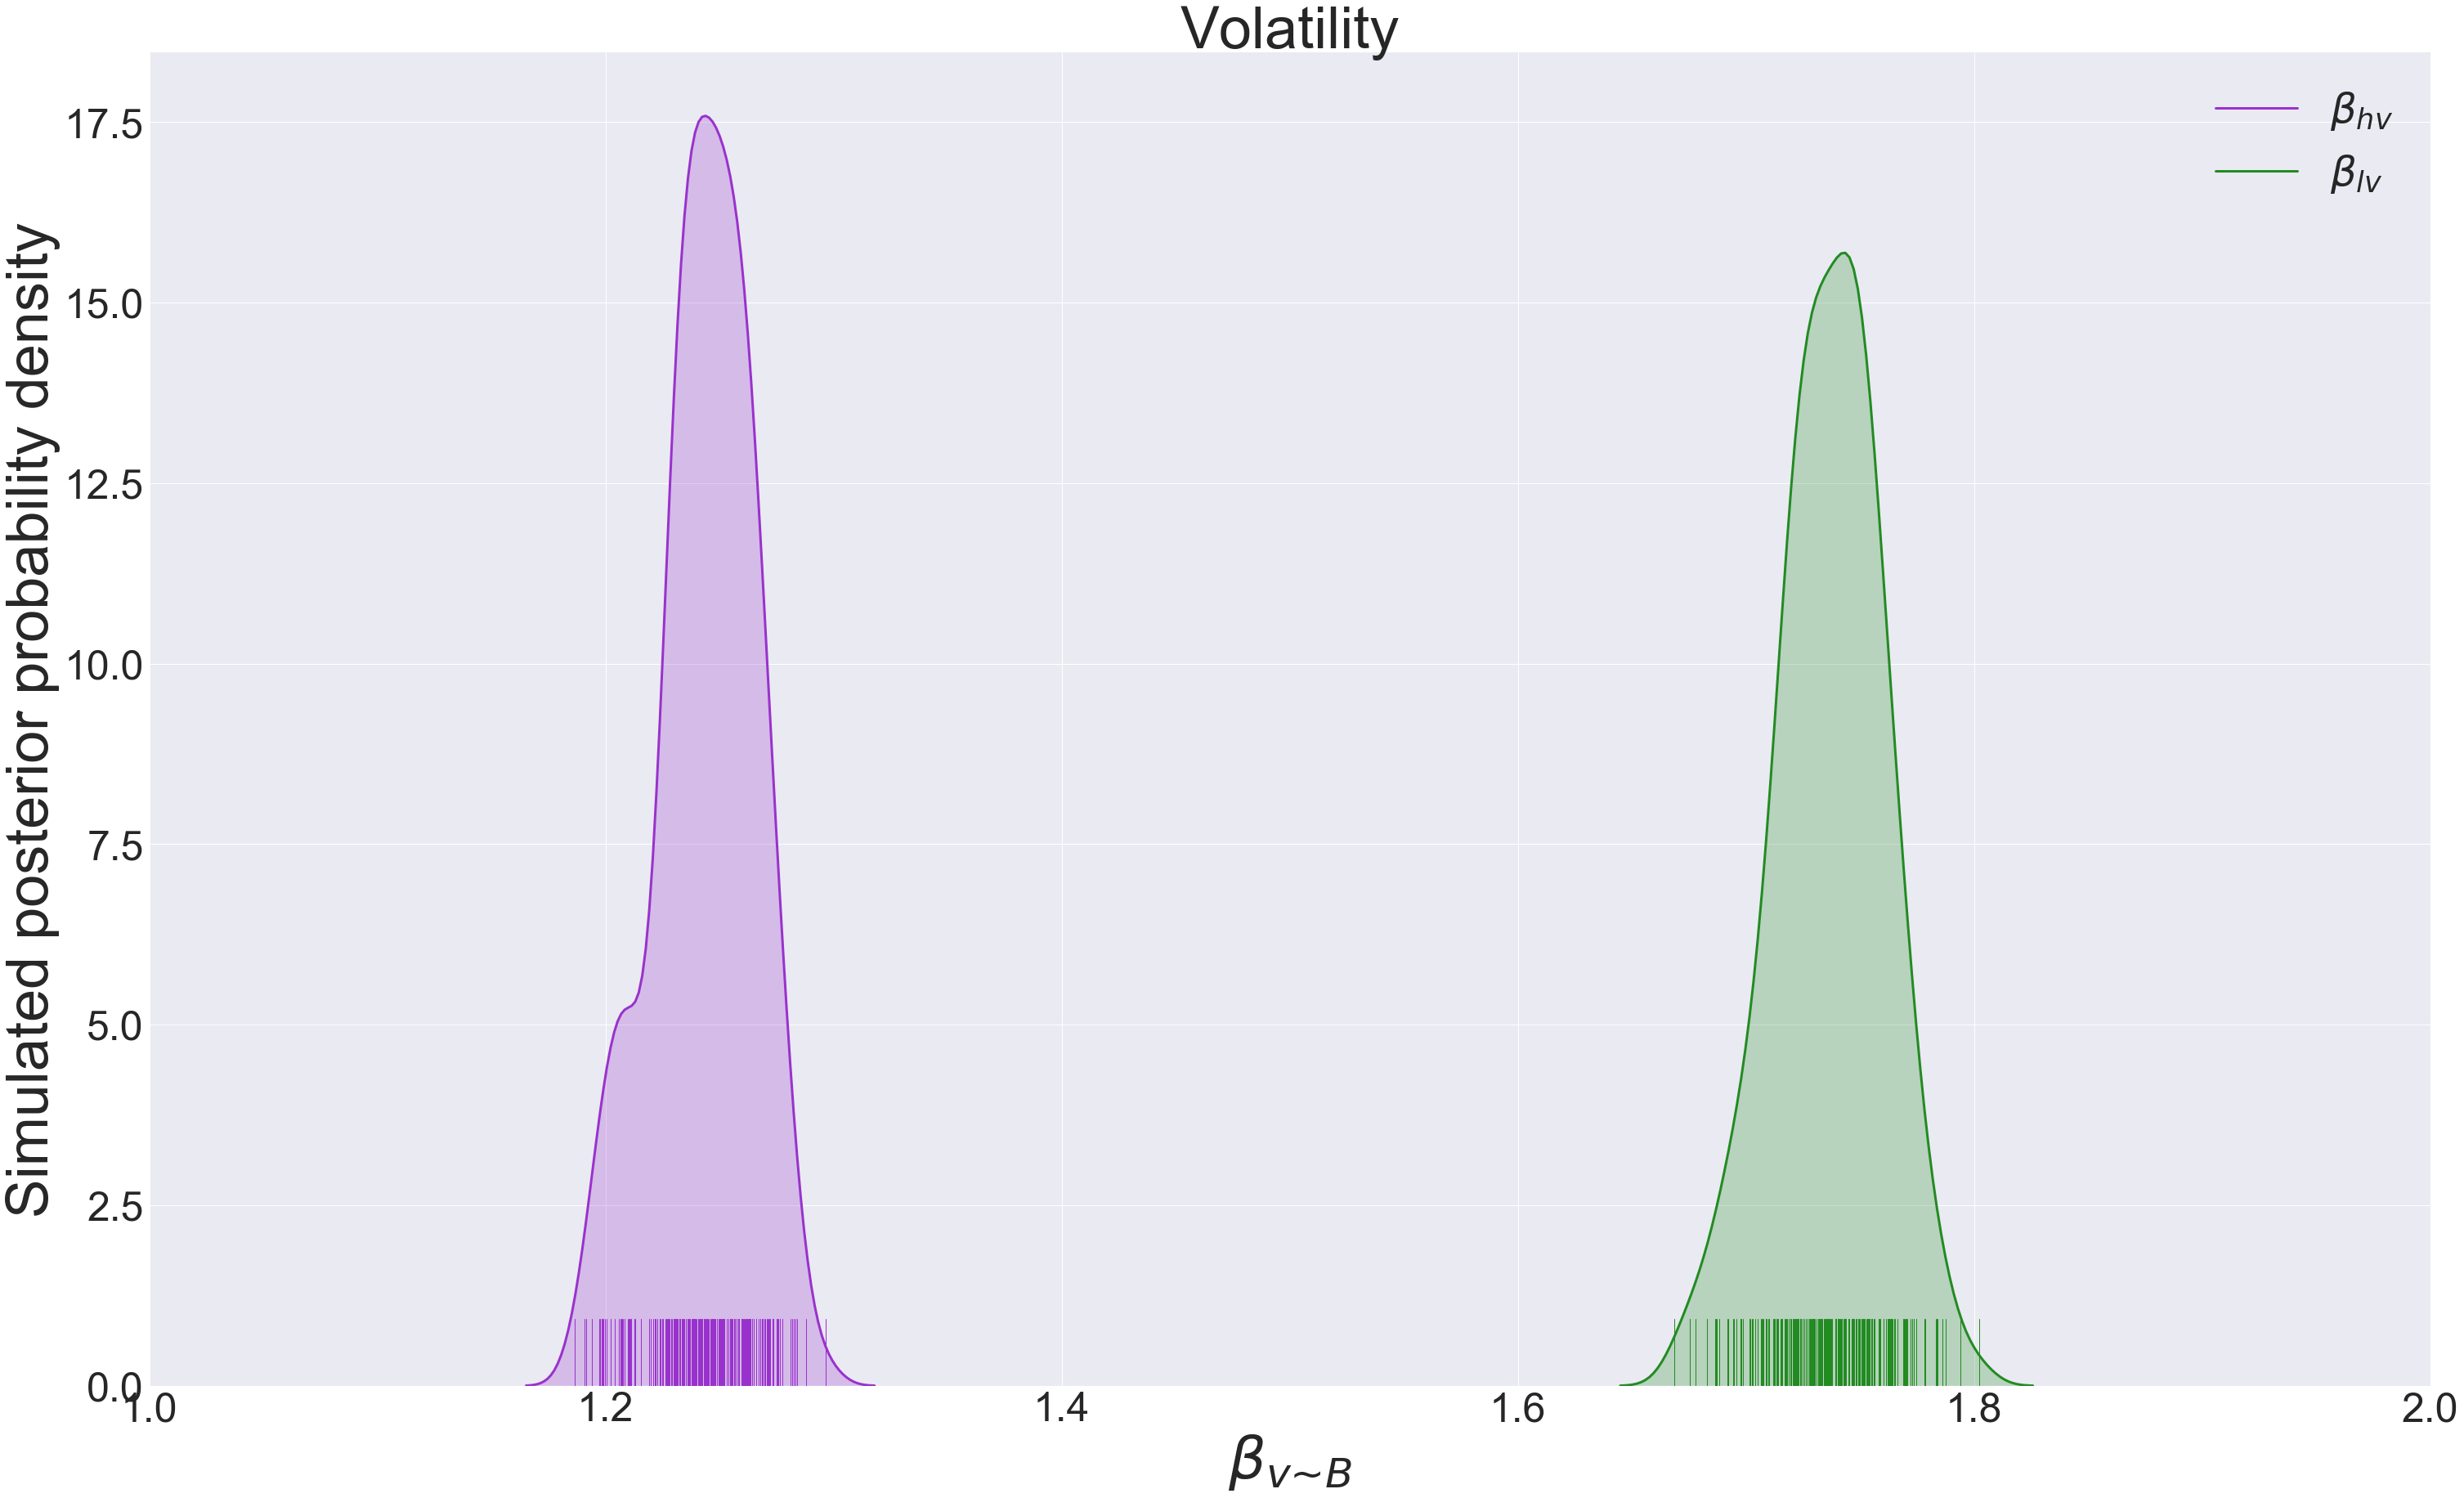

In [65]:
plt.figure(figsize=(50,30))
sns.distplot(v_hv_gen.trace(), label=r'$\beta_{hv}$', hist=False,rug=True,color='darkorchid', kde_kws = {'shade': True, 'linewidth': 3})
sns.distplot(v_lv_gen.trace(), label=r'$\beta_{lv}$', hist=False,rug=True,color='forestgreen', kde_kws = {'shade': True, 'linewidth': 3})
plt.title('Volatility', fontsize='large')
plt.ylabel('Simulated posterior probability density', fontsize='large')
plt.xlabel(r'$\beta_{v\textasciitilde B}$',fontsize='large')
plt.xlim([1,2])
plt.savefig('vB_betas_volatility_SIM.png', dpi=600)

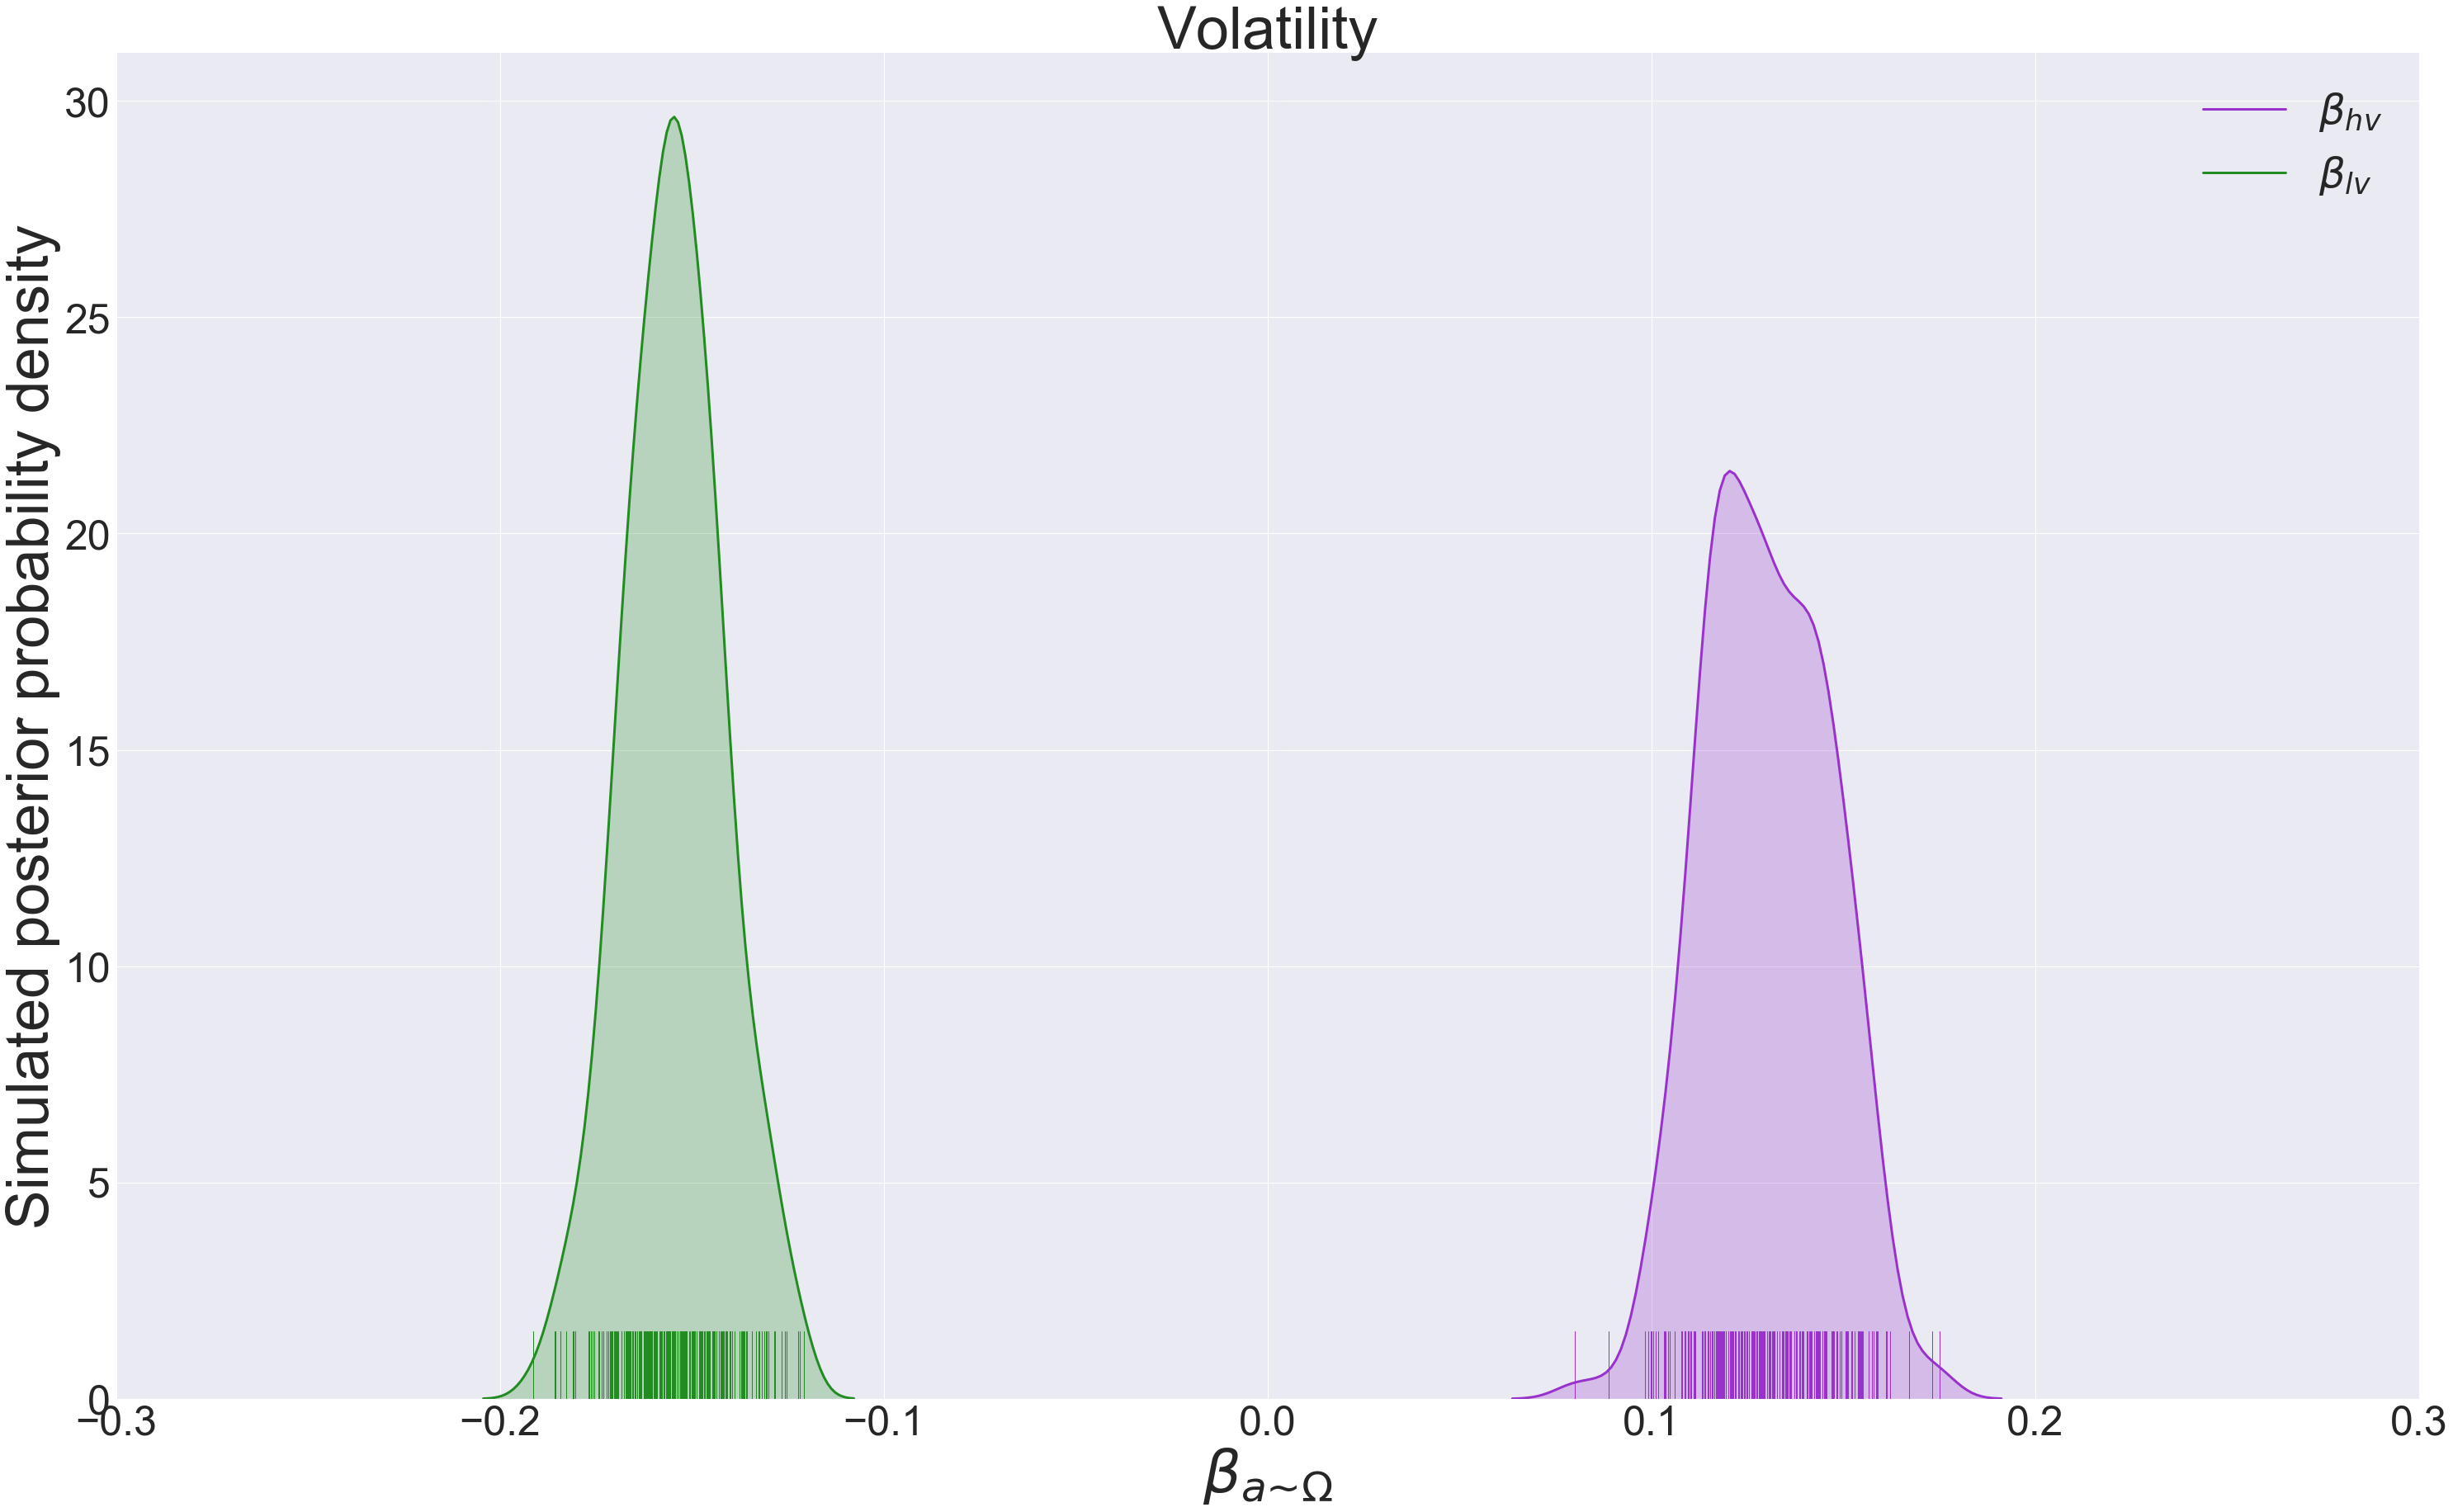

In [63]:
plt.figure(figsize=(50,30))
sns.distplot(a_hv_gen.trace(), label=r'$\beta_{hv}$', hist=False,rug=True,color='darkorchid', kde_kws = {'shade': True, 'linewidth': 3})
sns.distplot(a_lv_gen.trace(), label=r'$\beta_{lv}$', hist=False,rug=True,color='forestgreen', kde_kws = {'shade': True, 'linewidth': 3})
plt.title('Volatility', fontsize='large')
plt.ylabel('Simulated posterior probability density', fontsize='large')
plt.xlabel(r'$\beta_{a\textasciitilde \Omega}$',fontsize='large')
plt.xlim([-0.3,0.3])
plt.savefig('aCPP_betas_volatility_SIM.png', dpi=600)

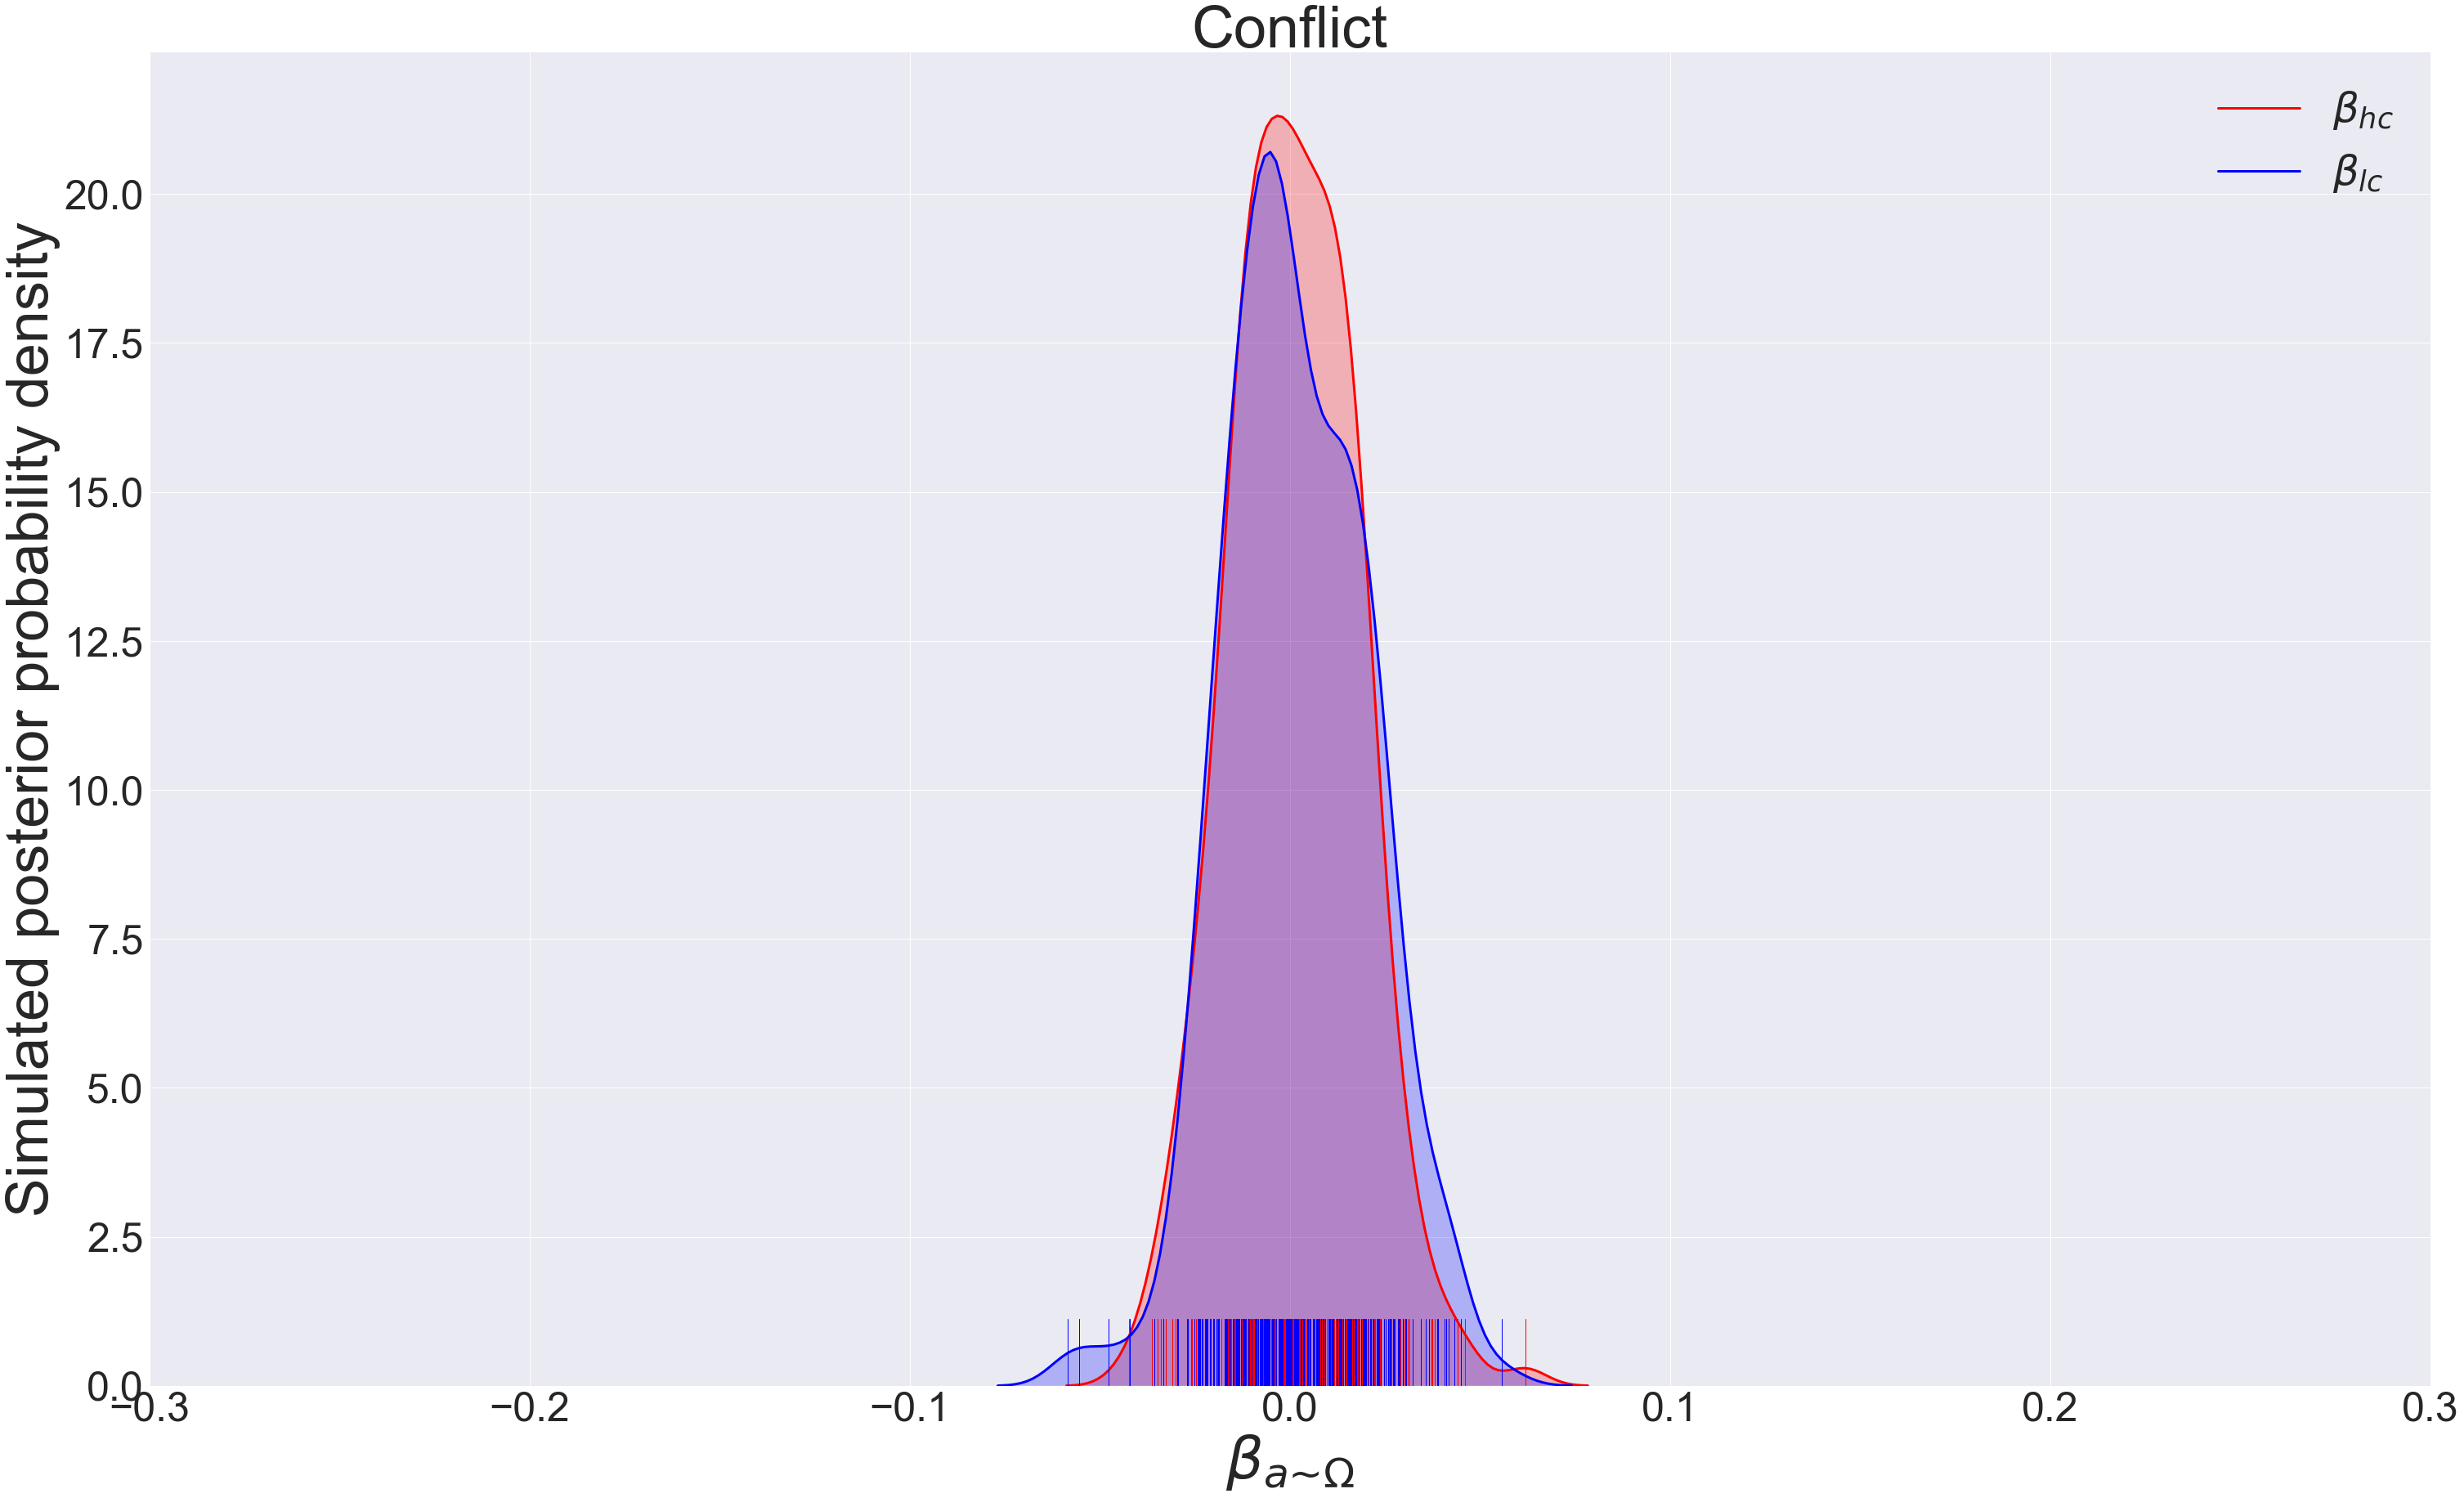

In [64]:
plt.figure(figsize=(50,30))
sns.distplot(a_hc_gen.trace(), label=r'$\beta_{hc}$', hist=False,rug=True,color='red', kde_kws = {'shade': True, 'linewidth': 3})
sns.distplot(a_lc_gen.trace(), label=r'$\beta_{lc}$', hist=False,rug=True,color='blue', kde_kws = {'shade': True, 'linewidth': 3})
plt.title('Conflict', fontsize='large')
plt.ylabel('Simulated posterior probability density', fontsize='large')
plt.xlabel(r'$\beta_{a\textasciitilde \Omega}$',fontsize='large')
plt.xlim([-0.3,0.3])
plt.savefig('aCPP_betas_conflict_SIM.png', dpi=600)